In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline 

import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays

In [0]:
for date, name in sorted(holidays.IND(state='TN', years=2018).items()):
  print(date, name)

2018-01-01 New Year
2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-05-01 Labour Day
2018-08-15 Independence Day
2018-10-02 Gandhi Jayanti
2018-12-25 Christmas


In [0]:
dailyEnergy = pd.read_excel('/content/drive/My Drive/dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
TimeReviewed                   505 non-null datetime64[ns]
Solar_Power_Consumption(Kw)    505 non-null float64
Temp( C)                       505 non-null float64
EmployeeCount                  505 non-null int64
weekday                        505 non-null int64
day_type                       505 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 23.8 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**LINEAR REGRESSION**

In [0]:
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]



In [0]:
from sklearn.linear_model import LinearRegression
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print ("The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test))


The test score R2:  0.6370849327485768


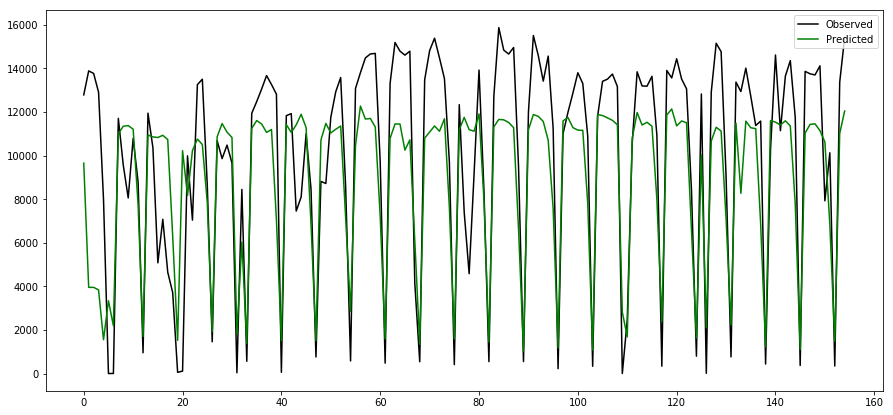

In [0]:
fig = plt.figure(figsize=(15,7))
plt.plot(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

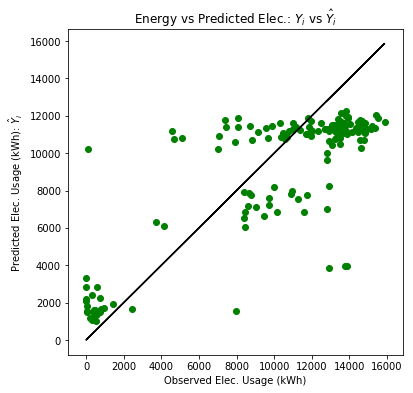

In [0]:
fig = plt.figure(figsize=(6,6))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

**USING LSTM**

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

energy=pd.read_excel('/content/drive/My Drive/dailyEnergyWithFeatures.xlsx')
# save to file

energy['weekday'] = energy['TimeReviewed'].dt.dayofweek
energy['day_type'] = np.zeros(len(energy))
energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1

energy.to_excel('/content/drive/My Drive/energy.xlsx')  
energy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,2017-12-26,12782.411988,25.000000,121,1,1.0
1,2017-12-27,13883.010020,25.375000,0,2,0.0
2,2017-12-28,13766.083029,24.833333,0,3,0.0
3,2017-12-29,12904.092990,24.833333,0,4,0.0
4,2017-12-30,7985.972000,25.906250,0,5,1.0
5,2017-12-31,0.000000,25.343750,29,6,1.0
6,2018-01-01,0.000000,25.666667,0,0,1.0
7,2018-01-02,11703.730007,25.416667,113,1,0.0
8,2018-01-03,9560.972003,24.708333,118,2,0.0
9,2018-01-04,8055.488012,24.595745,120,3,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('/content/drive/My Drive/energy (2).csv', header=0, index_col=0)
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values 
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed


   var1(t-1)  var2(t-1)  var3(t-1)  ...  var3(t)   var4(t)  var5(t)
1   0.714262   0.062762   0.521552  ...    0.000  0.333333      0.0
2   0.775761   0.112971   0.000000  ...    0.000  0.500000      0.0
3   0.769228   0.040446   0.000000  ...    0.000  0.666667      0.0
4   0.721061   0.040446   0.000000  ...    0.000  0.833333      1.0
5   0.446244   0.184100   0.000000  ...    0.125  1.000000      1.0

[5 rows x 10 columns]


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
6,0.000000,0.108787,0.125000,1.000000,1.0,0.000000,0.152022,0.000000,0.000000,1.0
7,0.000000,0.152022,0.000000,0.000000,1.0,0.653986,0.118550,0.487069,0.166667,0.0
8,0.653986,0.118550,0.487069,0.166667,0.0,0.534252,0.023710,0.508621,0.333333,0.0
9,0.534252,0.023710,0.508621,0.333333,0.0,0.450128,0.008635,0.517241,0.500000,0.0
10,0.450128,0.008635,0.517241,0.500000,0.0,0.602844,0.076709,0.521552,0.666667,0.0


In [0]:

values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 9) (365,) (139, 1, 9) (139,)


In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])



In [0]:
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 365 samples, validate on 139 samples
Epoch 1/20
 - 5s - loss: 0.2787 - acc: 0.6986 - val_loss: 0.2509 - val_acc: 0.6906
Epoch 2/20
 - 0s - loss: 0.2335 - acc: 0.6986 - val_loss: 0.2169 - val_acc: 0.6906
Epoch 3/20
 - 0s - loss: 0.2057 - acc: 0.6986 - val_loss: 0.1975 - val_acc: 0.6906
Epoch 4/20
 - 0s - loss: 0.1896 - acc: 0.6986 - val_loss: 0.1831 - val_acc: 0.6906
Epoch 5/20
 - 0s - loss: 0.1748 - acc: 0.7068 - val_loss: 0.1689 - val_acc: 0.7842
Epoch 6/20
 - 0s - loss: 0.1594 - acc: 0.7808 - val_loss: 0.1539 - val_acc: 0.8273
Epoch 7/20
 - 0s - loss: 0.1481 - acc: 0.8164 - val_loss: 0.1395 - val_acc: 0.8273
Epoch 8/20
 - 0s - loss: 0.1351 - acc: 0.8274 - val_loss: 0.1264 - val_acc: 0.8345
Epoch 9/20
 - 0s - loss: 0.1228 - acc: 0.8411 - val_loss: 0.1146 - val_acc: 0.8345
Epoch 10/20
 - 0s - loss: 0.1129 - acc: 0.8438 - val_loss: 0.1038 - val_acc: 0.8345
Epoch 11/20
 - 0s - loss: 0.1049 - acc: 0.8438 - val_loss: 0.0941 - val_acc: 0.8417
Epoch 12/20
 - 0s - loss: 0.0943 - acc:

In [0]:
score = model.evaluate(test_X, test_y, batch_size=70, verbose=1)
 
print('Test accuracy:', score[1])
print('Accuracy:',score[1]*100)
 

139/139 [==============================] - 0s 51us/step
Test accuracy: 0.9712230095760428
Accuracy: 97.12230095760428


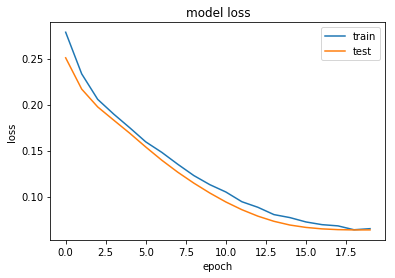

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4516.314


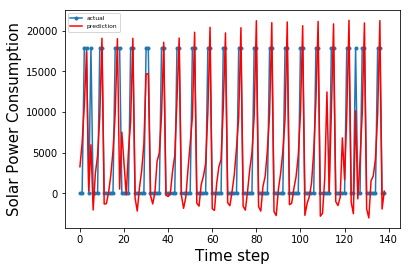

In [0]:
aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [0]:
n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")

Enter the day for which the value is to be predicted:125
The value of the consumption the next day will be 10139.626533700617 and the percentage change is  76.49548462677528 %
